In [1]:
import os
import json
from pycocotools.coco import COCO
import os
import pathlib
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [2]:
ROOT_DIR = pathlib.Path(os.path.abspath(os.getcwd())).parent
DATA_DIR = os.path.join(ROOT_DIR, "data")

print("check if dirs exists: ")
print(os.path.exists(DATA_DIR), os.path.exists(ROOT_DIR))

check if dirs exists: 
True True


In [3]:
train_ann_path = os.path.join(DATA_DIR, "random_coco_split_train.json")
val_ann_path = os.path.join(DATA_DIR, "random_coco_split_val.json")
images_path = os.path.join(DATA_DIR, "images")

# EDA

In [4]:
with open(train_ann_path) as f:
    train_ann = json.load(f)
    print("categories: ", train_ann["categories"])

with open(val_ann_path) as f:
    val_ann = json.load(f)
    print("categories: ", val_ann["categories"])

categories:  [{'id': 1, 'name': 'tooth_11', 'supercategory': ''}, {'id': 2, 'name': 'tooth_12', 'supercategory': ''}, {'id': 3, 'name': 'tooth_13', 'supercategory': ''}, {'id': 4, 'name': 'tooth_14', 'supercategory': ''}, {'id': 5, 'name': 'tooth_15', 'supercategory': ''}, {'id': 6, 'name': 'tooth_16', 'supercategory': ''}, {'id': 7, 'name': 'tooth_17', 'supercategory': ''}, {'id': 8, 'name': 'tooth_18', 'supercategory': ''}, {'id': 9, 'name': 'tooth_21', 'supercategory': ''}, {'id': 10, 'name': 'tooth_22', 'supercategory': ''}, {'id': 11, 'name': 'tooth_23', 'supercategory': ''}, {'id': 12, 'name': 'tooth_24', 'supercategory': ''}, {'id': 13, 'name': 'tooth_25', 'supercategory': ''}, {'id': 14, 'name': 'tooth_26', 'supercategory': ''}, {'id': 15, 'name': 'tooth_27', 'supercategory': ''}, {'id': 16, 'name': 'tooth_28', 'supercategory': ''}, {'id': 17, 'name': 'tooth_31', 'supercategory': ''}, {'id': 18, 'name': 'tooth_32', 'supercategory': ''}, {'id': 19, 'name': 'tooth_33', 'supercate

In [5]:
# check if number of image = number of annotations
train_coco = COCO(train_ann_path)
val_coco = COCO(val_ann_path)
num_imgs = len(os.listdir(images_path))

print("number of images in train: ", len(train_coco.imgs))
print("number of images in val: ", len(val_coco.imgs))
print("number of images in images folder: ", num_imgs)



loading annotations into memory...
Done (t=0.11s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
number of images in train:  73
number of images in val:  17
number of images in images folder:  90


loading annotations into memory...
Done (t=0.06s)
creating index...
index created!


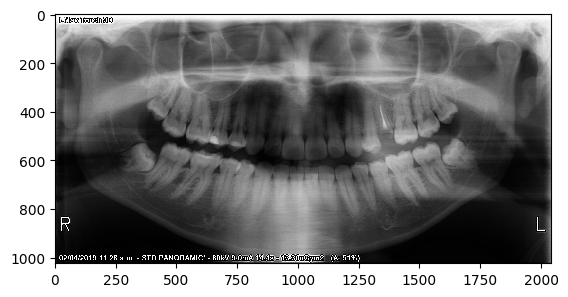

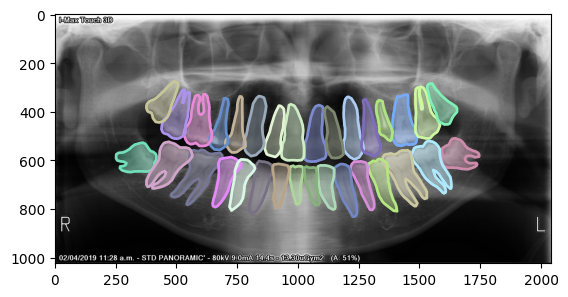

In [6]:
# check annotations 
coco = COCO(train_ann_path)
image_id = 1
img = coco.imgs[1]
image = np.array(Image.open(os.path.join(images_path, img['file_name'])))
plt.imshow(image, interpolation='nearest', cmap='gray')
plt.show()

plt.imshow(image, cmap='gray')
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
coco.showAnns(anns)

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


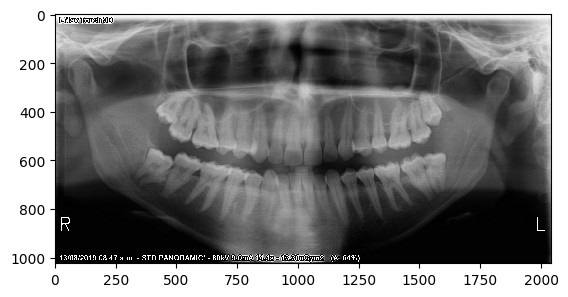

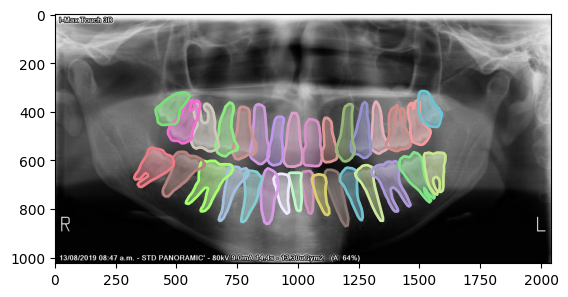

In [7]:
# check annotations 
coco = COCO(val_ann_path)
image_id = 0
img = coco.imgs[image_id]
image = np.array(Image.open(os.path.join(images_path, img['file_name'])))
plt.imshow(image, interpolation='nearest', cmap='gray')
plt.show()

plt.imshow(image, cmap='gray')
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
coco.showAnns(anns)